# 1- importation des données 

In [1]:
#importation des bibliothèques necessaires
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, auc
%matplotlib inline


In [2]:
#importation des données
data1 = pd.read_csv('Churn.csv')

#  2- compréhension de données 

In [3]:
#afficher les premiers données 
print(data1.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [99]:
#Générez des statistiques descriptives
data1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [100]:
#Détectez les valeurs manquantes pour un objet de type tableau.
data1.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
data1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#vérifier qu'il n'ya pas des valeurs manquantes
data1.isna().values.any()

False

In [8]:
#vérifier qu'il n'ya pas des valeurs manquantes
data1.isna().values.any()

False

In [9]:
data1.shape

(7043, 21)

In [10]:
data1["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
data1.isnull().sum().sum()

0

In [12]:
data1.notnull().values.any()

True

In [13]:
data1.notnull().sum().sum()

147903

In [14]:
data1.fillna(data1.mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#supprimer les lignes ayant des valeurs null
data1.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data1.drop(["customerID"],axis=1,inplace = True)



In [6]:
data1.shape

(7043, 20)

In [7]:
data1['StreamingTV'] = data1['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
print('StreamingTV  :\n',data1.StreamingTV.value_counts())

StreamingTV  :
 0    4336
1    2707
Name: StreamingTV, dtype: int64


In [8]:
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'],errors='coerce')

In [9]:
data_dummied = pd.get_dummies(data1,columns=['PaymentMethod','Contract','InternetService','gender'])
data_dummied['TotalCharges']=data_dummied['TotalCharges'].fillna(data_dummied['TotalCharges'].mean())

In [10]:
data_dummied = pd.get_dummies(data1,columns=['PaymentMethod','Contract','InternetService','gender'])



In [11]:
data_dummied.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,gender_Female,gender_Male
0,0,Yes,No,1,No,No phone service,No,Yes,No,No,...,1,0,1,0,0,1,0,0,1,0
1,0,No,No,34,Yes,No,Yes,No,Yes,No,...,0,1,0,1,0,1,0,0,0,1
2,0,No,No,2,Yes,No,Yes,Yes,No,No,...,0,1,1,0,0,1,0,0,0,1
3,0,No,No,45,No,No phone service,Yes,No,Yes,Yes,...,0,0,0,1,0,1,0,0,0,1
4,0,No,No,2,Yes,No,No,No,No,No,...,1,0,1,0,0,0,1,0,1,0


In [12]:
data_dummied.shape

(7043, 28)

In [13]:
data_dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   object 
 2   Dependents                               7043 non-null   object 
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   object 
 5   MultipleLines                            7043 non-null   object 
 6   OnlineSecurity                           7043 non-null   object 
 7   OnlineBackup                             7043 non-null   object 
 8   DeviceProtection                         7043 non-null   object 
 9   TechSupport                              7043 non-null   object 
 10  StreamingTV                              7043 no

# 3- visualisation des données

# b-data cleaning

In [14]:
data_dummied["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
data_dummied["Partner"].replace(["Yes","No"],[0,1],inplace= True)

In [16]:
data_dummied["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
data_dummied["Dependents"].replace(["Yes","No"],[0,1],inplace= True)

In [18]:
data_dummied["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
data_dummied["PhoneService"].replace(["Yes","No"],[0,1],inplace= True)

In [20]:
data_dummied["MultipleLines"].replace(["Yes","No","No phone service"],[0,1,2],inplace= True)

In [21]:
data_dummied["MultipleLines"].unique()

array([2, 1, 0])

In [22]:
data_dummied["OnlineSecurity"].replace(["No internet service","Yes","No"],[0,1,2],inplace= True)

In [23]:
data_dummied["OnlineSecurity"].unique()

array([2, 1, 0])

In [24]:
data_dummied["OnlineBackup"].replace(["Yes","No","No internet service"],[0,1,2],inplace= True)

In [25]:
data_dummied["OnlineBackup"].unique()

array([0, 1, 2])

In [26]:
data_dummied["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
data_dummied["DeviceProtection"].replace(["Yes","No","No internet service"],[0,1,2],inplace= True)

In [28]:
data_dummied["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [29]:
data_dummied["TechSupport"].replace(["Yes","No","No internet service"],[0,1,2],inplace= True)

In [30]:
data_dummied["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [31]:
data_dummied["StreamingMovies"].replace(["Yes","No","No internet service"],[0,1,2],inplace= True)

In [32]:
data_dummied["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
data_dummied["PaperlessBilling"].replace(["Yes","No"],[0,1],inplace= True)

In [35]:
data_dummied["StreamingMovies"].unique()

array([1, 0, 2])

In [36]:
data_dummied["StreamingMovies"].unique()

array([1, 0, 2])

In [38]:
data_dummied["OnlineSecurity"].unique()

array([2, 1, 0])

In [39]:
data_dummied["Churn"].replace(["Yes","No"],[0,1],inplace= True)

In [40]:
data_dummied["PaymentMethod_Bank transfer (automatic)"].unique()

array([0, 1], dtype=uint8)

In [41]:
data_dummied.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,gender_Female,gender_Male
0,0,0,1,1,1,2,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,0,1,1,34,0,1,1,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,0,1,1,2,0,1,1,0,1,1,...,0,1,1,0,0,1,0,0,0,1
3,0,1,1,45,1,2,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,1,1,2,0,1,2,1,1,1,...,1,0,1,0,0,0,1,0,1,0


In [42]:
data_dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

In [43]:
data_dummied.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check               uint8
PaymentMethod_Mailed check     

In [44]:
# We will use the data frame where we had created dummy variables
y = data_dummied['Churn'].values
X = data_dummied.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [45]:
X= data_dummied.iloc[:,0:14].values
y= pd.factorize(data_dummied['Churn'])[0]

In [46]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# 1-Arbre de décision CART:

# a-Centrage Réduction avec MinMaxScaler():

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier(random_state=3)

In [52]:
dt.fit(X_train, y_train);

In [53]:
print('train score = ', dt.score(X_train, y_train))
print('test_score = ', dt.score(X_test, y_test))

train score =  0.9941176470588236
test_score =  0.7302413629910081


# matrice de confusion 

In [54]:
from sklearn.metrics import plot_confusion_matrix

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (7043).

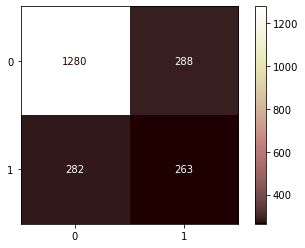

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test,display_labels=data_dummied.Churn,cmap=plt.cm.pink)  
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

[[1284  284]
 [ 289  256]]


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1568
           1       0.47      0.47      0.47       545

    accuracy                           0.73      2113
   macro avg       0.65      0.64      0.64      2113
weighted avg       0.73      0.73      0.73      2113



l'application de l'arbre de décision  avec le type de scalling (MinMaxScaler ) a donnée une performence plus au moins bonne 0.73 , concernant les precisions on remarque une tres bonne prediction pour les personnes qui ne vont se désabonner (0.82) , par contre il y a une baisse de precision pour les personnes qui vont se desabonner 0.48 (a ameliorer ) .

Feature: 0, Score: 0.02875
Feature: 1, Score: 0.03209
Feature: 2, Score: 0.02810
Feature: 3, Score: 0.27136
Feature: 4, Score: 0.00409
Feature: 5, Score: 0.03432
Feature: 6, Score: 0.10960
Feature: 7, Score: 0.02177
Feature: 8, Score: 0.01834
Feature: 9, Score: 0.03061
Feature: 10, Score: 0.01504
Feature: 11, Score: 0.01827
Feature: 12, Score: 0.02992
Feature: 13, Score: 0.35773


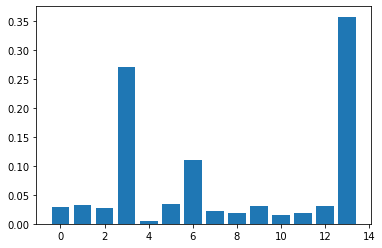

In [57]:
import matplotlib.pyplot as plt
dt.fit(X_train, y_train);
# get importance
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [58]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,15)}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5)

In [61]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [62]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [63]:
final_model = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3 )

In [64]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [65]:
print('train score = ', final_model.score(X_train, y_train))
print('test_score = ', final_model.score(X_test, y_test))

train score =  0.7845841784989858
test_score =  0.7988641741599621


Feature: 0, Score: 0.02875
Feature: 1, Score: 0.03209
Feature: 2, Score: 0.02810
Feature: 3, Score: 0.27136
Feature: 4, Score: 0.00409
Feature: 5, Score: 0.03432
Feature: 6, Score: 0.10960
Feature: 7, Score: 0.02177
Feature: 8, Score: 0.01834
Feature: 9, Score: 0.03061
Feature: 10, Score: 0.01504
Feature: 11, Score: 0.01827
Feature: 12, Score: 0.02992
Feature: 13, Score: 0.35773


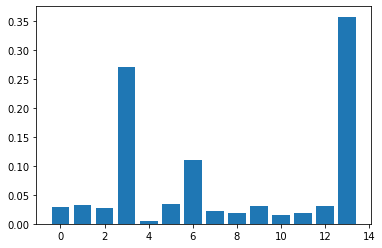

In [66]:
importance = dt.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [67]:
print('test_score = ', final_model.score(X_test, y_test))

test_score =  0.7988641741599621


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (7043).

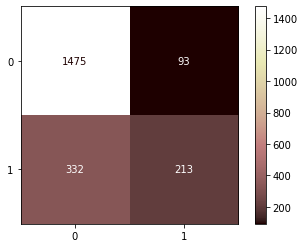

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test,display_labels=data1.Churn,cmap=plt.cm.pink)  
plt.show()

In [69]:
ypred = final_model.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1568
           1       0.70      0.39      0.50       545

    accuracy                           0.80      2113
   macro avg       0.76      0.67      0.69      2113
weighted avg       0.79      0.80      0.78      2113



[Text(167.4, 190.26, 'MultipleLines <= 0.75\ngini = 0.393\nsamples = 4930\nvalue = [3606, 1324]'),
 Text(83.7, 135.9, 'Dependents <= 0.312\ngini = 0.214\nsamples = 2445\nvalue = [2147, 298]'),
 Text(41.85, 81.53999999999999, 'StreamingMovies <= 0.635\ngini = 0.331\nsamples = 808\nvalue = [639, 169]'),
 Text(20.925, 27.180000000000007, 'gini = 0.293\nsamples = 736\nvalue = [605, 131]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.498\nsamples = 72\nvalue = [34, 38]'),
 Text(125.55000000000001, 81.53999999999999, 'StreamingMovies <= 0.744\ngini = 0.145\nsamples = 1637\nvalue = [1508, 129]'),
 Text(104.625, 27.180000000000007, 'gini = 0.092\nsamples = 1258\nvalue = [1197, 61]'),
 Text(146.475, 27.180000000000007, 'gini = 0.294\nsamples = 379\nvalue = [311, 68]'),
 Text(251.10000000000002, 135.9, 'Dependents <= 0.229\ngini = 0.485\nsamples = 2485\nvalue = [1459, 1026]'),
 Text(209.25, 81.53999999999999, 'StreamingMovies <= 0.511\ngini = 0.484\nsamples = 1136\nvalue = [466, 670]

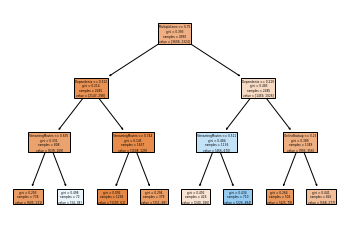

In [70]:
from sklearn.tree import plot_tree
plot_tree(final_model,feature_names = list(data1.columns[:-1]),filled=True)

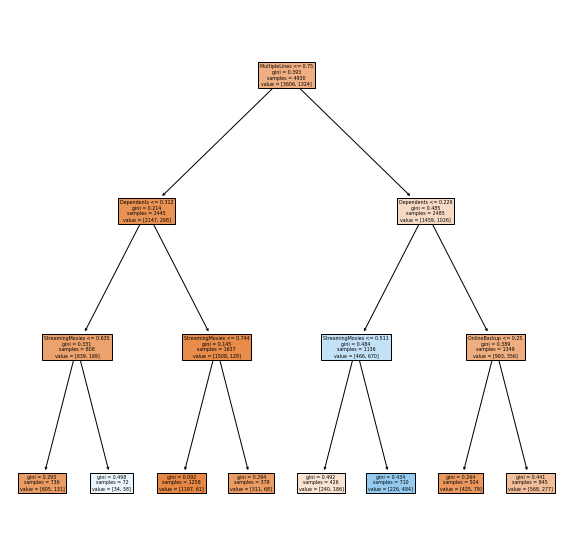

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(final_model,feature_names = list(data1.columns[:-1]),filled=True)
plt.show()

In [72]:
from sklearn.tree import export_text
print(export_text(final_model))

|--- feature_6 <= 0.75
|   |--- feature_3 <= 0.31
|   |   |--- feature_13 <= 0.64
|   |   |   |--- class: 0
|   |   |--- feature_13 >  0.64
|   |   |   |--- class: 1
|   |--- feature_3 >  0.31
|   |   |--- feature_13 <= 0.74
|   |   |   |--- class: 0
|   |   |--- feature_13 >  0.74
|   |   |   |--- class: 0
|--- feature_6 >  0.75
|   |--- feature_3 <= 0.23
|   |   |--- feature_13 <= 0.51
|   |   |   |--- class: 0
|   |   |--- feature_13 >  0.51
|   |   |   |--- class: 1
|   |--- feature_3 >  0.23
|   |   |--- feature_9 <= 0.25
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.25
|   |   |   |--- class: 0



# random forest

In [73]:
#create function for validation and return accuracy and roc-auc score
def evaluate_model(model):
    model.fit(X_train,y_train)
    prediction_test = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    rocauc = metrics.roc_auc_score(y_test, prediction_test)
    return accuracy,rocauc,prediction_test

In [132]:
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
acc,rocauc,testpred_rf  = evaluate_model(rf)
print('Random Forest...')
print('Accuracy score :',acc)
print('ROC-AUC score :',rocauc)

Random Forest...
Accuracy score : 0.791292001893043
ROC-AUC score : 0.6774146929413968


In [75]:
#Parameter Tuning for random Forest¶

#set up search grid
#Number of search trees
n_estimators=range(50,100)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(4,8)
# Minimum number of samples required to split a node
min_samples_split = range(2,6)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,5)
# Method of selecting samples for training each tree
bootstrap = [True, False]
#criterion
criterion=['gini','entropy']
#create the random grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap,
              'criterion':criterion}
print(random_grid)

{'n_estimators': range(50, 100), 'max_features': ['auto', 'sqrt'], 'max_depth': range(4, 8), 'min_samples_split': range(2, 6), 'min_samples_leaf': range(1, 5), 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [76]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=2018)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, n_iter=100,random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2018),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(4, 8),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 6),
                                        'n_estimators': range(50, 100)},
                   random_state=42, verbose=2)

In [77]:
#best params
params = rf_random.best_params_
params

{'n_estimators': 85,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'entropy',
 'bootstrap': True}

In [78]:
rfc = RandomForestClassifier(**params,random_state=42)
rfc.fit(X_train,y_train)
acc,rocauc,testpred_rfc  = evaluate_model(rfc)
print('Random Forest Optimized...')
print('Accuracy score :',acc)
print('ROC-AUC score :',rocauc)

Random Forest Optimized...
Accuracy score : 0.8031235210601041
ROC-AUC score : 0.6728170052424639


In [112]:
print('test_score = ', rfc.score(X_test, y_test))

test_score =  0.8031235210601041


# Naive Bayes

In [79]:
X= data_dummied.iloc[:,1:12].values
y= data_dummied['Churn']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [81]:
import mpmath
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [82]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [83]:
data_dummied["Churn"] = data_dummied["Churn"].astype(int)

Y_train = data_dummied["Churn"]
X_train = data_dummied.drop(labels = ["Churn"],axis = 1)


In [83]:
expected = y_val
predicted = model.predict(X_val)

In [84]:
metrics.classification_report(expected, predicted)

'              precision    recall  f1-score   support\n\n           0       0.50      0.71      0.58       463\n           1       0.88      0.74      0.80      1298\n\n    accuracy                           0.73      1761\n   macro avg       0.69      0.72      0.69      1761\nweighted avg       0.78      0.73      0.75      1761\n'

In [85]:
metrics.confusion_matrix(expected, predicted)

array([[327, 136],
       [333, 965]])

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_val,predicted)

0.7336740488358887

In [114]:
print('train score = ', final_model.score(X_train, y_train))
print('test_score = ', final_model.score(X_test, y_test))

train score =  0.7845841784989858
test_score =  0.7988641741599621


# KNN

In [92]:
X= data_dummied.iloc[:,0:14].values
y= pd.factorize(data_dummied['Churn'])[0]

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [95]:
from sklearn.neighbors import KNeighborsClassifier



Text(0, 0.5, 'Erreur')

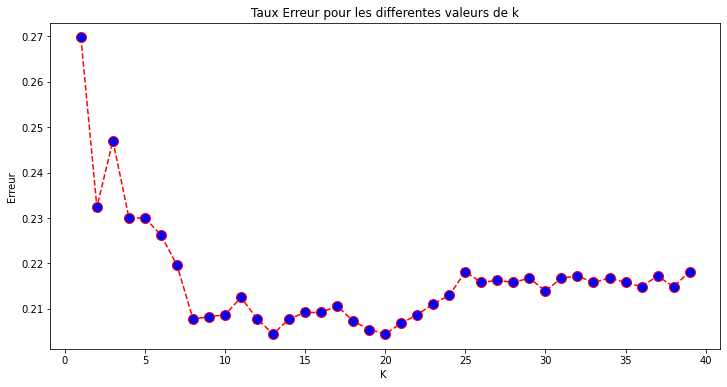

In [96]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [97]:
knn = KNeighborsClassifier(23)
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)

In [98]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.79


In [115]:
print('test_score = ', knn.score(X_test, y_test))

test_score =  0.7889256980596309


# SVM 

In [142]:
#Polynomial Kernel
from sklearn.svm import SVC
svclass = SVC(kernel='poly', degree=8)
svclass.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [145]:
y_pred1 = svclass.predict(X_test)

In [146]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[1361  207]
 [ 283  262]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1568
           1       0.56      0.48      0.52       545

    accuracy                           0.77      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



In [147]:
print('Accuracy of SVM class on training set: {:.2f}'
     .format(svclass.score(X_train, y_train)))
print('Accuracy of SVM class on test set: {:.2f}'
     .format(svclass.score(X_test, y_test)))

Accuracy of SVM class on training set: 0.88
Accuracy of SVM class on test set: 0.77


In [148]:
print('test_score = ', svclass.score(X_test, y_test))

test_score =  0.7681022243256034


In [149]:
#Gaussian Kernel
from sklearn.svm import SVC
svclassifier1 = SVC(kernel='rbf')
svclassifier1.fit(X_train, y_train)

SVC()

In [150]:
y_pred2 = svclassifier1.predict(X_test)

In [151]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[1448  120]
 [ 292  253]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1568
           1       0.68      0.46      0.55       545

    accuracy                           0.81      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.81      0.79      2113



In [152]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svclassifier1.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svclassifier1.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.81


In [153]:
print('test_score = ', svclassifier1.score(X_test, y_test))

test_score =  0.8050165641268339


In [156]:
#Sigmoid Kernel
from sklearn.svm import SVC
svclassifier2 = SVC(kernel='sigmoid')
svclassifier2.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [157]:
y_pred3 = svclassifier2.predict(X_test)

In [158]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[1175  393]
 [ 367  178]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1568
           1       0.31      0.33      0.32       545

    accuracy                           0.64      2113
   macro avg       0.54      0.54      0.54      2113
weighted avg       0.65      0.64      0.64      2113



In [159]:
print('Accuracy of SVM classifier2 on training set: {:.2f}'
     .format(svclassifier2.score(X_train, y_train)))
print('Accuracy of SVM classifier2 on test set: {:.2f}'
     .format(svclassifier2.score(X_test, y_test)))

Accuracy of SVM classifier2 on training set: 0.63
Accuracy of SVM classifier2 on test set: 0.64


In [160]:
print('test_score = ', svclassifier2.score(X_test, y_test))

test_score =  0.6403218173213441


# Regression logistique

In [1]:
# Fitting Logistic Regression to the Training set

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
modele_logit = LogisticRegression(penalty='l1', solver='liblinear')
modele_logit.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
modele_logit.predict(X_test)
modele_logit.score(X_test, y_test)


In [ ]:
print('train score = ', modele_logit.score(X_train, y_train))
print('test_score = ', modele_logit.score(X_test, y_test))

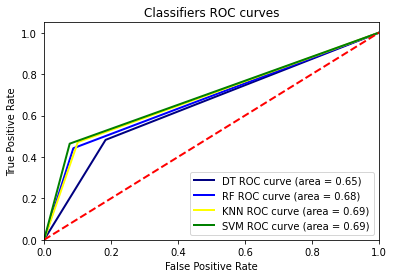

In [161]:
from sklearn.metrics import roc_curve, auc
y_pred_dt = dt.predict(X_test)
y_pred_rf=rf.predict(X_test)
#y_pred_naive=model.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_svm=svclassifier1.predict(X_test)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dt) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rf) 
roc_auc2 = auc(fpr2, tpr2)
#fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_naive) 
#roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_knn) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_svm) 
roc_auc5 = auc(fpr5, tpr5)

plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='DT ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='RF ROC curve (area = %0.2f)'% roc_auc2)
#plt.plot(fpr3, tpr3, color='orange', lw=2, label='NAIVE ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='yellow', lw=2, label='KNN ROC curve (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='green', lw=2, label='SVM ROC curve (area = %0.2f)'% roc_auc5)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()